In [57]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
from fastai.data.external import untar_data, URLs
from fastai.torch_core import tensor, show_image
from fastbook import plot_function

In [58]:
path = untar_data(URLs.MNIST_SAMPLE)

In [59]:
path.ls()

(#3) [Path('/Users/kreimben/.fastai/data/mnist_sample/valid'),Path('/Users/kreimben/.fastai/data/mnist_sample/labels.csv'),Path('/Users/kreimben/.fastai/data/mnist_sample/train')]

In [60]:
(path / 'train').ls()

(#2) [Path('/Users/kreimben/.fastai/data/mnist_sample/train/7'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3')]

간략하게 3과 7만 사용한다.

In [61]:
three = (path / 'train' / '3').ls().sorted()
seven = (path / 'train' / '7').ls().sorted()

three

(#6131) [Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/kreimben/.fastai/data/mnist_sample/train/3/10091.png')...]

In [62]:
im3_path = three[1]
im3 = Image.open(im3_path)
im3

In [63]:
np.array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [64]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [65]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## 픽셀 유사성으로 3과 7 구분하기

두 숫자 그룹에 대한 평균 픽셀값을 구하는것이다.

In [66]:
seven_tensors = [tensor(Image.open(o)) for o in seven]
three_tensors = [tensor(Image.open(o)) for o in three]
len(three_tensors), len(seven_tensors)

(6131, 6265)

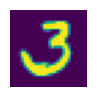

In [67]:
show_image(three_tensors[123]);

모든 이미지를 대상으로 각 픽셀 위치의 전체 평균을 계산하여 각 픽셀의 강도를 구하는 것이 목표였다. 그러려면 리스트 내의 모든 이미지를 3차원 텐서 하나로 결합해야한다. 일반적으로 3차원 텐서는 rank-3 텐서라고 함. 이렇게 컬렉션에 담긴 개별 텐서들을 쌓아 올려 단일 텐서를 만드는 일은 꽤 흔한 작업 패턴이다. 그래서 파이토치는 이 작업을 수행하는 stack이라는 함수를 제공한다.

평균 계산 등 파이토치가 제공하는 일부 연산은 정수 대신 부동소수형 데이터만을 지원하여, 작업에 따라 형 변환을 해야한다.

In [68]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [69]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

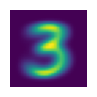

In [70]:
show_image(mean3);

<Axes: >

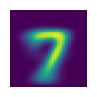

In [71]:
show_image(mean7)

In [72]:
stacked_threes.ndim

3

축이 3개라는 소리. 차원과 구별할 줄 알아야 함.

<Axes: >

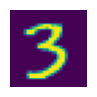

In [73]:
from random import randint

N = len(stacked_threes)

a_3 = stacked_threes[1]
show_image(a_3)

이상적인 숫자 3과의 거리를 어떻게 구할까?
1. 차이의 적댓값에 대한 평균을 구하는 (음수를 양수화) 방법. L1 노름 또는 평균절대차 (Mean Absolute Difference, MAD)라고 함.
1. 차이의 제곱(모든 수를 양수화 한다)에 대한 평균의 제굽근(제곱을 다시 원상태로 돌린다)을 구하는 방법. L2 노름 또는 평균제곱근오차 (Root Mean Squared Error, RMSE)라고 함.

In [74]:
# L1
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()
dist_3_abs, dist_7_abs

(tensor(0.1114), tensor(0.1586))

In [75]:
# L2
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_3_sqr, dist_7_sqr

(tensor(0.2021), tensor(0.3021))

각 방법 모두에서 선택한 숫자 3 이미지는 '이상적인' 숫자 7보다 이상적인 숫자 3과의 거리가 더 짧습니다. 즉 간단히 만든 기준선 모델이 예측을 올바르게 수행했다고 볼 수 있다.
이것을 손실함수로 다시 측정해 보자.

In [76]:
from torch.nn.functional import l1_loss, mse_loss

l1_loss(a_3.float(), mean7), mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

결국 궁극적인 목표는 `is_3`라는 함수를 만들어 어떠한 이미지가 오더라도 3인지 7인지 구별할 수 있는 모델을 세우는것이다. 그렇게 하기 위해서는 두 이미지 사이의 거리를 계산해야 하므로, 거리의 개념부터 정의 해야함.

In [77]:
valid_3_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path / 'valid' / '3').ls()]
)
valid_7_tens = torch.stack(
    [tensor(Image.open(o)) for o in (path / 'valid' / '7').ls()]
)

In [78]:
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255

In [79]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [80]:
def mnist_distance(a, b): return (a - b).abs().mean((-1, -2))
mnist_distance(a_3, mean3), mnist_distance(a_3, mean7)

(tensor(0.1114), tensor(0.1586))

그런데 전체 이미지에 대한 평가지표를 계산하려면, 검증용 데이터셋 내 **모든** 이미지와 이상적인 숫자 3 이미지의 거리를 계산해야 한다.

In [81]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [82]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [83]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [84]:
# is_3(valid_3_dist)

In [85]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

이렇게 하면 꽤나 신뢰성 높은 함수를 얻을 수 있다.

하지만, 더 나은 결과를 얻으려면 실제로 무언가를 학습하는 시스템을 시도해야 함. 즉 시스템이 스스로 자동 수정해나가도록 하는 방법이 필요하다.
이를 SGD로 해결해 보자.

특정 이미지와 '이상적인 이미지' 사이의 유사도를 찾는 대신, 개별 픽셀마다 가중치를 설정하고 숫자를 표현하는 검은색 픽셀의 가중치를 높이는 방법을 생각해보자. 가령 숫자 7 이미지 우측 하단에 위치한 픽셀은 활성화 될 가능성이 매우 낮지만, 숫자 3 이미지라면 해당 부분이 높은 확률로 활성화됨. 따라서 이미지 우측 하단 픽셀들의 가중치는 숫자 7에서는 낮게, 숫자 3에서는 높게 매겨짐. 이 과정은 이미지 픽셀(x)과 각 픽셀에 대한 가중치(w)를 입력받는 함수로 표현할 수 있다. 가령 숫자 3이 될 확률은 아래와 같다.

In [86]:
def pr_three(pixels, weight): return (pixels * weight).sum()

# MNIST loss function

In [87]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)

In [88]:
train_y = tensor([1] * len(three_tensors) + [0] * len(seven_tensors)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [89]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [90]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [91]:
def init_params(size, std=1.0): return (torch.randn(size) * std).requires_grad_()
weights = init_params((28 * 28, 1))
weights

tensor([[ 1.9269e+00],
        [ 1.4873e+00],
        [ 9.0072e-01],
        [-2.1055e+00],
        [ 6.7842e-01],
        [-1.2345e+00],
        [-4.3067e-02],
        [-1.6047e+00],
        [-7.5214e-01],
        [ 1.6487e+00],
        [-3.9248e-01],
        [-1.4036e+00],
        [-7.2788e-01],
        [-5.5943e-01],
        [-7.6884e-01],
        [ 7.6245e-01],
        [ 1.6423e+00],
        [-1.5960e-01],
        [-4.9740e-01],
        [ 4.3959e-01],
        [-7.5813e-01],
        [ 1.0783e+00],
        [ 8.0080e-01],
        [ 1.6806e+00],
        [ 1.2791e+00],
        [ 1.2964e+00],
        [ 6.1047e-01],
        [ 1.3347e+00],
        [-2.3162e-01],
        [ 4.1759e-02],
        [-2.5158e-01],
        [ 8.5986e-01],
        [-1.3847e+00],
        [-8.7124e-01],
        [-2.2337e-01],
        [ 1.7174e+00],
        [ 3.1888e-01],
        [-4.2452e-01],
        [ 3.0572e-01],
        [-7.7459e-01],
        [-1.5576e+00],
        [ 9.9564e-01],
        [-8.7979e-01],
        [-6

In [92]:
bias = init_params(1)
bias

tensor([0.3472], requires_grad=True)

신경망에서는 `y = w * x + b` 방정식의 w를 가중치(weights), b를 편향이라고 함. 그리고 가중치와 편향을 모두 통틀어서 `parameter`라고 지칭함.

In [93]:
(train_x[0] * weights.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [94]:
def linear1(xb): return xb @ weights + bias

In [95]:
preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

정확도를 검사하기 위해서 예측이 3인지 7인지 판단하려면 출력값이 0.5보다 큰지를 검사하면 된다.

In [96]:
corrects = (preds > 0.5).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

그리고 가중치 하나를 약간 바꿨을 때 정확도에 일어나는 변화를 실험해보자.

In [97]:
# weights[0] *= 1.0001

In [98]:
preds = linear1(train_x)
((preds > 0.5).float() == train_y).float().mean().item()

0.5355759859085083

(경사하강법 작동방식은 따로 참조)

SGD를 쓴다면 그라디언트를 계속해서 계산 할 수 밖에 없고 결국 0이 최적이니 더이상 계산이 일어나지 않는다.
그렇기 때문에 그 정확도 대신 약간 더 나은 예측을 도출한 가중치에 따라 약간 더 나은 손실을 계산하는 손실 함수가 필요함.

손실 함수는 이미지 자체가 아니라 모델 예측을 입력받는다. 따라서 이미지가 3인지에 대한 예측으로 0부터 1까지의 사잇값을 가지는 prds라는 한 인자를 정의함.
이 인자는 이미지로 색인된 벡터임.

손실 함수의 목적은 예측값과 참값 (target or label) 사이의 달므을 측정하는 것. 예측 인자는 앞서 언급했으므로, 이번에는 0 또는 1의 값을 가지는 `trgts`라는 인자를 정의함. 이 또한 이미지 별로 색인된 벡터임.

예를 들어 실제 정답이 3, 7, 3인 이미지 세장을 떠올려 보자. 모델은 높은 신뢰도 (0.9)로 첫번째 이미지가 3이고, 약간의 신뢰도(0.4)로 두번째 이미지가 7이라 예측했지만, 낮은 신뢰도(0.2)로 세번째 이미지가 7이라 틀리게 예측했다고 가정해 보겠습니다. 이때 손실 함수는 다음 6개의 값을 입력 받는다.

In [99]:
targets = tensor([1., 0., 1.])
predicts = tensor([0.9, 0.4, 0.2])

In [100]:
# 그리고 predictions와 targets 사이의 거리를 측정하는 손실 함수를 만든다.

def mnist_loss(predictions, targets):
    '''
    Exactly same with below python comprehension
    `[b[i] if a[i] else c[i] for i in range(len(a))]`
    
    This function returns the probability if the target is 1, otherwise returns 1 - probability (and normally would be 0).
    :param predictions: 
    :param targets: 
    :return: float and tensor
    '''
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [101]:
mnist_loss(predicts, targets)

tensor(0.4333)

In [102]:
# 손실율을 계산하는 함수이니 결과값이 줄어들 수록 당연히 좋은것이다.

mnist_loss(torch.tensor([1., 0., 1.]), targets)

tensor(0.)

하지만 이 함수는 결과 값이 0과 1사이에 반드시 포함된지는 않을 가능성이 있다. 그렇기 때문에 반드시 손실률을 0과 1사이로 제한하는 함수를 만들어야 한다.
sigmoid를 이용해 보자.

In [103]:
def sigmoid(x): return 1 / (1 + torch.exp(-x))

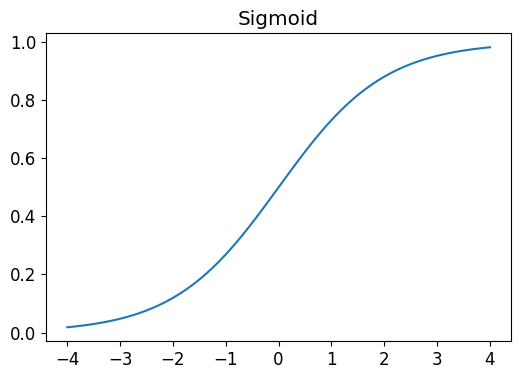

In [104]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [105]:
def mnist_loss(predictions, targets):
    '''
    이제 예측이 0과 1 사잇값이 아니더라도 손실 함수가 잘 작동한다고 확신할 수 있다. 단 하나의 전제 조건은 높은 예측값이 곧 높은 신뢰도로 연결된다는 사실이다.
    :param predictions: 
    :param targets: 
    :return: 
    '''
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

# 손실이 왜 필요한가

평가지표는 사람의 이해를 돕고, 손실은 자동화된 학습을 이끌어간다는 점이 주된 차이이다. 따라서 손실은 유의미한 미분이 있는 함수여야만 한다. 넓고 평평하거나 급작스러운 변화구간이 있어선 안되며, 적당히 매끄러운 형태를 띄어야만 한다. 앞서 구상했던 작은 신뢰도 변화에도 반응하는 손실 함수가 이런 특징을 수용한다. 손실 함수의 요구 사항은 사람이 정한 달성 목표를 정확히 반영하지는 못하지만, 달성 목표와 그레디언트로 최적화 될 수 있는 함수 사이의 절충안으로 볼 수 있다. 손실 함수는 데이터셋의 각 요소에 대해 계산되고, 한 에포크가 끝나는 시점에는 모든 손실값의 평균을 구할 수 있다.

반면 평가지표는 사람이 실제로 관심을 가지는 숫자이다. 매 에포크의 끝에서 모델이 얼마나 학습을 잘했는지를 알려주는 값이다. 

## 손실보다는 평가지표로 모델의 성능을 판단해야 한다는 사실을 기억하자.

In [ ]:
# 최적화 단계

